In [145]:
import numpy as np 
import pandas as pd

In [146]:
df = pd.read_csv('Churn_Modelling.csv')

In [147]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [149]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [151]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [152]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [153]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [155]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [156]:
model = Sequential()

model.add(Dense(9,activation='relu',input_dim=11))
model.add(Dense(9,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\Abhimanyu Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [157]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 9)              │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [159]:
history = model.fit(X_train,y_train,batch_size=32,epochs=300,verbose=1,validation_split=0.15)

Epoch 1/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5418 - loss: 1610.5922 - val_accuracy: 0.7592 - val_loss: 26.3621
Epoch 2/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7144 - loss: 9.6591 - val_accuracy: 0.7833 - val_loss: 10.6558
Epoch 3/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7165 - loss: 4.4590 - val_accuracy: 0.7725 - val_loss: 1.4123
Epoch 4/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7222 - loss: 3.9226 - val_accuracy: 0.7883 - val_loss: 5.9059
Epoch 5/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7163 - loss: 4.2635 - val_accuracy: 0.7875 - val_loss: 5.6794
Epoch 6/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7297 - loss: 3.9438 - val_accuracy: 0.5142 - val_loss: 3.2440
Epoch 7/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7235 - loss: 4.9948 - val_accuracy: 0.7458 - val_loss: 4.6807
Epoch 8/300
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7221 - loss: 4.9001 - val

In [160]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [161]:
y_pred

array([[0.20632738],
       [0.20632738],
       [0.20632738],
       ...,
       [0.20632738],
       [0.20632738],
       [0.20632738]], shape=(2000, 1), dtype=float32)

In [162]:
y_pred = y_pred.argmax(axis=-1)

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

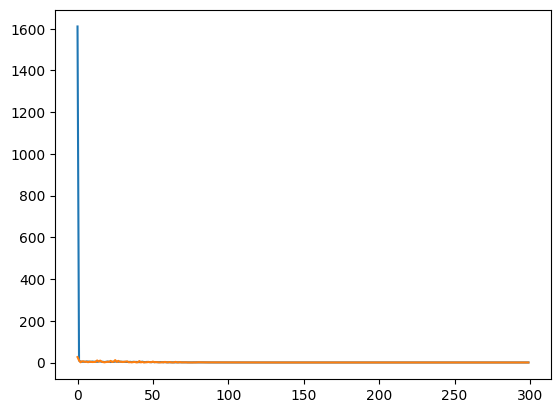

In [164]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

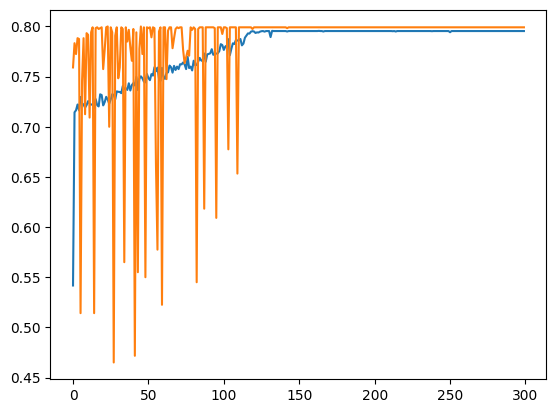

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])